In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import sys
import algorithms
import seaborn as sns
sns.reset_orig()

In [2]:
curr_dir = os.getcwd()
parking_dir = curr_dir + '/SDOT_Loads'

In [3]:
os.chdir(parking_dir)

files = []

for fi in glob.glob('*.csv'):
    
    # Dropping the first row of data which are labels.
    block = np.genfromtxt(fi, delimiter=',')[1:]
    
    # Dropping days where there is no parking, sundays or holidays.
    block = block[~np.all(block == 0, axis=1)]
    
    files.append(block)
    
os.chdir(curr_dir)

In [4]:
test_file = files[0]

In [5]:
x_train = test_file[:130, :20]
y_train = test_file[:130, 23, None]
x_test = test_file[130:160, :20]
y_test = test_file[130:160, 23, None]

In [7]:
nonpar = algorithms.NonparametricRegression()

[ 0.8894933]


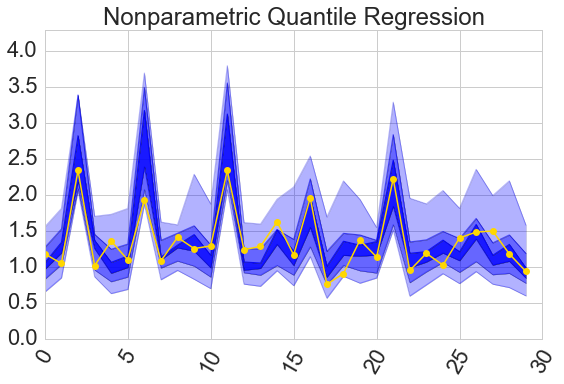

In [7]:
nonpar.fit(x_train, y_train)
nonpar.predict(x_test, y_test)
nonpar.plot_results()
plt.show()